# Two-Country, Two Good Trade and Production Simulation

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Model description

## Model Choice: Heckscher-Ohlin Model

For our model project, we decided to draw on the Heckscher-Ohlin (H-O) model, which is a model in international economics that explains international trade patterns based on countries' differences in factor endowments. The core idea is that countries will export goods that intensively use their relatively abundant factors of production and import goods that intensively use their relatively scarce factors. Accordingly, the model draws on the concept of comparative advantages by considering multiple factors of production (here: technology, capital and labor), and highlights the importance of these factors' relative endowments in driving trade patterns.

## Operationalization of the Model

The provided code models a two-country, two-good world, applying the H-O model principles:

1. **Factor Intensities and Productivity Parameters**:
   Each good has defined factor intensities (`alpha` for capital and `beta` for labor) that influence how these factors contribute to production.

2. **Country Endowments**:
   Each country has specific quantities of capital (`K`) and labor (`L`), influencing their production capabilities. Additionally, technology parameters (`A`) represent the overall productivity of the two respective countries.

3. **Objective Function**:
   The function aims to maximize total production across both countries, optimizing the distribution of capital and labor across goods and countries based on output according to Cobb-Douglas production functions.

5. **Trade Simulation**:
   After determining optimal production, trade flows are calculated based on comparative production outputs, suggesting that each country exports the good it produces more efficiently relative to its domestic consumption. For simplification, there are no barriers for trade and each good is allocated in equal shares between the two countries.

## Formal Expression and Parameter Definition

**Production Functions:**
$$
Q_{i,j} = A_{i} \times K_{i,j}^{\alpha_j} \times L_{i,j}^{\beta_j}
$$
Where:
- $Q_{i,j}$ is the quantity of good $j$ produced in country $i$.
- $A_i$ is the productivity level in country $i$.
- $K_{i,j}$ and $L_{i,j}$ are the allocations of capital and labor to good $j$ in country $i$.
- $\alpha_j$ and $\beta_j$ are the capital and labor intensities for producing good $j$.

**Optimization Objective:**
$$
\text{Maximize} \, \sum_{i=1}^{2} \sum_{j=1}^{2} Q_{i,j}
$$

**Constraints:**
Total capital and labor in each country must be fully allocated:
$$
\sum_{j=1}^{2} K_{i,j} = K_i \\
\sum_{j=1}^{2} L_{i,j} = L_i
$$
for $i = \text{Home}, \text{Foreign}$.

**Trade Flow Calculation:**
$$
\text{Trade}_{i,j} = \pm (\text{Total Production}_{j} / 2 - \text{Production}_{i,j})
$$
Sign is positive for exports and negative for imports, depending on whether the balance is a surplus or deficit.


## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Lagrangian Function:

The Lagrangian function for the Heckscher-Ohlin (H-O) model is given by:

$$
\mathcal{L} = \sum_{i=1}^{2} \sum_{j=1}^{2} Q_{i,j} - \lambda_1 \left(\sum_{j=1}^{2} K_{i,j} - K_i\right) - \lambda_2 \left(\sum_{j=1}^{2} L_{i,j} - L_i\right)
$$

Where:
- $Q_{i,j}$ is the quantity of good $j$ produced in country $i$.
- $\lambda_1$ and $\lambda_2$ are Lagrange multipliers associated with the capital and labor constraints, respectively.
- $K_i$ and $L_i$ are the total capital and labor endowments in country $i$.

## Solutions:

The solutions to the Heckscher-Ohlin (H-O) model can be obtained by solving the system of equations derived from the Lagrangian method. The system of equations includes the following:

1. For $K_{i,j}$:
$$
\alpha_j A_i K_{i,j}^{\alpha_j - 1} L_{i,j}^{\beta_j}  = \lambda_1
% $$

2. For $L_{i,j}$:
$$
\beta_j A_i K_{i,j}^{\alpha_j} L_{i,j}^{\beta_j - 1} - \lambda_2 = 0
$$

3. For $\lambda_1$:
$$
\sum_{j=1}^{2} K_{i,j} - K_i = 0
$$

4. For $\lambda_2$:
$$
\sum_{j=1}^{2} L_{i,j} - L_i = 0
$$

These equations can be solved simultaneously to find the optimal allocations of capital and labor for each country and each good.


In [2]:
# Define symbols
Q1H, Q2H, Q1F, Q2F, L = sp.symbols('Q1H Q2H Q1F Q2F L')
K1H, K2H, L1H, L2H, K1F, K2F, L1F, L2F = sp.symbols('K1H K2H L1H L2H K1F K2F L1F L2F')
alpha, A_H, A_F, P1H, P2H, B, Q1_star, Q2_star = sp.symbols('alpha A_H A_F P1H P2H B Q1_star Q2_star')

# Define Cobb-Douglas utility function
U_H = Q1H**alpha * Q2H**(1-alpha)

# Define production functions
production_eqs = [
    Q1H - A_H * K1H**alpha * L1H**(1-alpha),
    Q2H - A_H * K2H**alpha * L2H**(1-alpha),
    Q1F - A_F * K1F**alpha * L1F**(1-alpha),
    Q2F - A_F * K2F**alpha * L2F**(1-alpha)
]

# Define market clearing conditions
market_clearing_eqs = [
    Q1H + Q1F - Q1_star,
    Q2H + Q2F - Q2_star
]

# Define budget constraint
budget_constraint_eq = P1H * Q1H + P2H * Q2H - B

# Define the Lagrangian
Lagrangian = U_H + L * (budget_constraint_eq) + sum([L * eq for eq in market_clearing_eqs])

# Solve the system of equations
solution = sp.solve([sp.diff(Lagrangian, var) for var in [Q1H, Q2H, Q1F, Q2F, L]], 
                    (Q1H, Q2H, Q1F, Q2F, L))

# Display the solution
print(solution)

[]


The result above suggests that there are no closed form analytical solutions.

## Numerical solution

We find that there are no closed form analytical solution from the above result.

In this numerical solution, we utilize a constrained optimization approach to simulate production and trade between two countries based on the Heckscher-Ohlin model. Each country produces two goods using distinct combinations of capital and labor, with production efficiencies defined by the parameters α and β. The objective function aims to maximize the total production across both countries, considering their individual factor endowments of capital and labor. In a next step, visualizations show how the respective production of each good and resulting trade patterns are affected by capital and labor endowments in the home country, illustrating the returns of possible investments in each production factor.

In [3]:
# Define factor intensities and productivity parameters
#these are the allocation factors for each of the economies and determines the production cap for each
alpha_1 = 0.4
alpha_2 = 0.5
beta_1 = 0.6
beta_2 = 0.5
A_home = A_foreign = 1  # Same productivity for simplicity

# Endowments in each country
#initial endowments
K_home, L_home = 52, 48
K_foreign, L_foreign = 48, 52

# Objective function to maximize total production in both countries
#objectvie function, Here the aim is essentially to maximize the total production of goods in both countries
def objective(x):
    K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
    Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
    Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
    Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
    Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
    return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

# Constraints for each country's total capital and labor
#each x here is there to ensure that the decision variabels dont break with the capital and labor constraints
constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},  # Home capital
    {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},  # Home labor
    {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},  # Foreign capital
    {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}  # Foreign labor
]

# Bounds to ensure non-negative values for capital and labor
bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

# Initial guesses for capital and labor allocation
initial_guess = [15, 15, 15, 15, 10, 10, 10, 10]

# Perform optimization using SLSQP method which supports bounds
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x

    # Calculate the production of each good in each country using optimal inputs
    total_production_good1_home = round(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1),2)
    total_production_good2_home = round(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2),2)
    total_production_good1_foreign = round(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1),2)
    total_production_good2_foreign = round(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2),2)
    total_production_good1 = round(total_production_good1_home + total_production_good1_foreign)
    total_production_good2 = round(total_production_good2_home + total_production_good2_foreign)

    print(f"Optimization Success: {result.success}")
    print(f"Home country: Good 1 (K1H = {K1H_opt:.2f}, L1H = {L1H_opt:.2f}), Good 2 (K2H = {K2H_opt:.2f}, L2H = {L2H_opt:.2f})")
    print(f"Foreign country: Good 1 (K1F = {K1F_opt:.2f}, L1F = {L1F_opt:.2f}), Good 2 (K2F = {K2F_opt:.2f}, L2F = {L2F_opt:.2f})")
    print("Total production of Good 1 in Home Country:", total_production_good1_home)
    print("Total production of Good 2 in Home Country:", total_production_good2_home)
    print("Total production of Good 1 in Foreign Country:", total_production_good1_foreign)
    print("Total production of Good 2 in Foreign Country:", total_production_good2_foreign)
    print("Total production of Good 1:", total_production_good1)
    print("Total production of Good 2:", total_production_good2)
else:
    print("Optimization failed:", result.message)

# Additional steps to calculate and simulate trade based on comparative advantages
# Assume: Simplified trading where each country exports the good it produces more efficiently than the other country
# Trade leads to equal allocation of goods between the two countries

# Logic to identify comparative advantages (based on output ratios):
home_balance_good1 = round(- (total_production_good1 / 2) + total_production_good1_home,2)
home_balance_good2 = round(- (total_production_good2 / 2) + total_production_good2_home,2)
home_balance_total = round(home_balance_good1 + home_balance_good2,2)

print("Trade Flows:")
if home_balance_good1 > 0:
    print("Home exports " + str(home_balance_good1) + " units of Good 1")
elif home_balance_good1 == 0:
    print("There is no trade with Good 1")
else:
    print("Home imports " + str(home_balance_good1)[1:] + " units of Good 1")

if home_balance_good2 > 0:
    print("Home exports " + str(home_balance_good2) + " units of Good 2")
elif home_balance_good2 == 0:
    print("There is no trade with Good 1")
else:
    print("Home imports " + str(home_balance_good2)[1:] + " units of Good 2")

if result.success:
    print("Total trade balance of home country: " + str(home_balance_total))

Optimization Success: True
Home country: Good 1 (K1H = 13.49, L1H = 16.53), Good 2 (K2H = 38.51, L2H = 31.47)
Foreign country: Good 1 (K1F = 31.29, L1F = 38.35), Good 2 (K2F = 16.71, L2F = 13.65)
Total production of Good 1 in Home Country: 15.24
Total production of Good 2 in Home Country: 34.81
Total production of Good 1 in Foreign Country: 35.35
Total production of Good 2 in Foreign Country: 15.11
Total production of Good 1: 51
Total production of Good 2: 50
Trade Flows:
Home imports 10.26 units of Good 1
Home exports 9.81 units of Good 2
Total trade balance of home country: -0.45


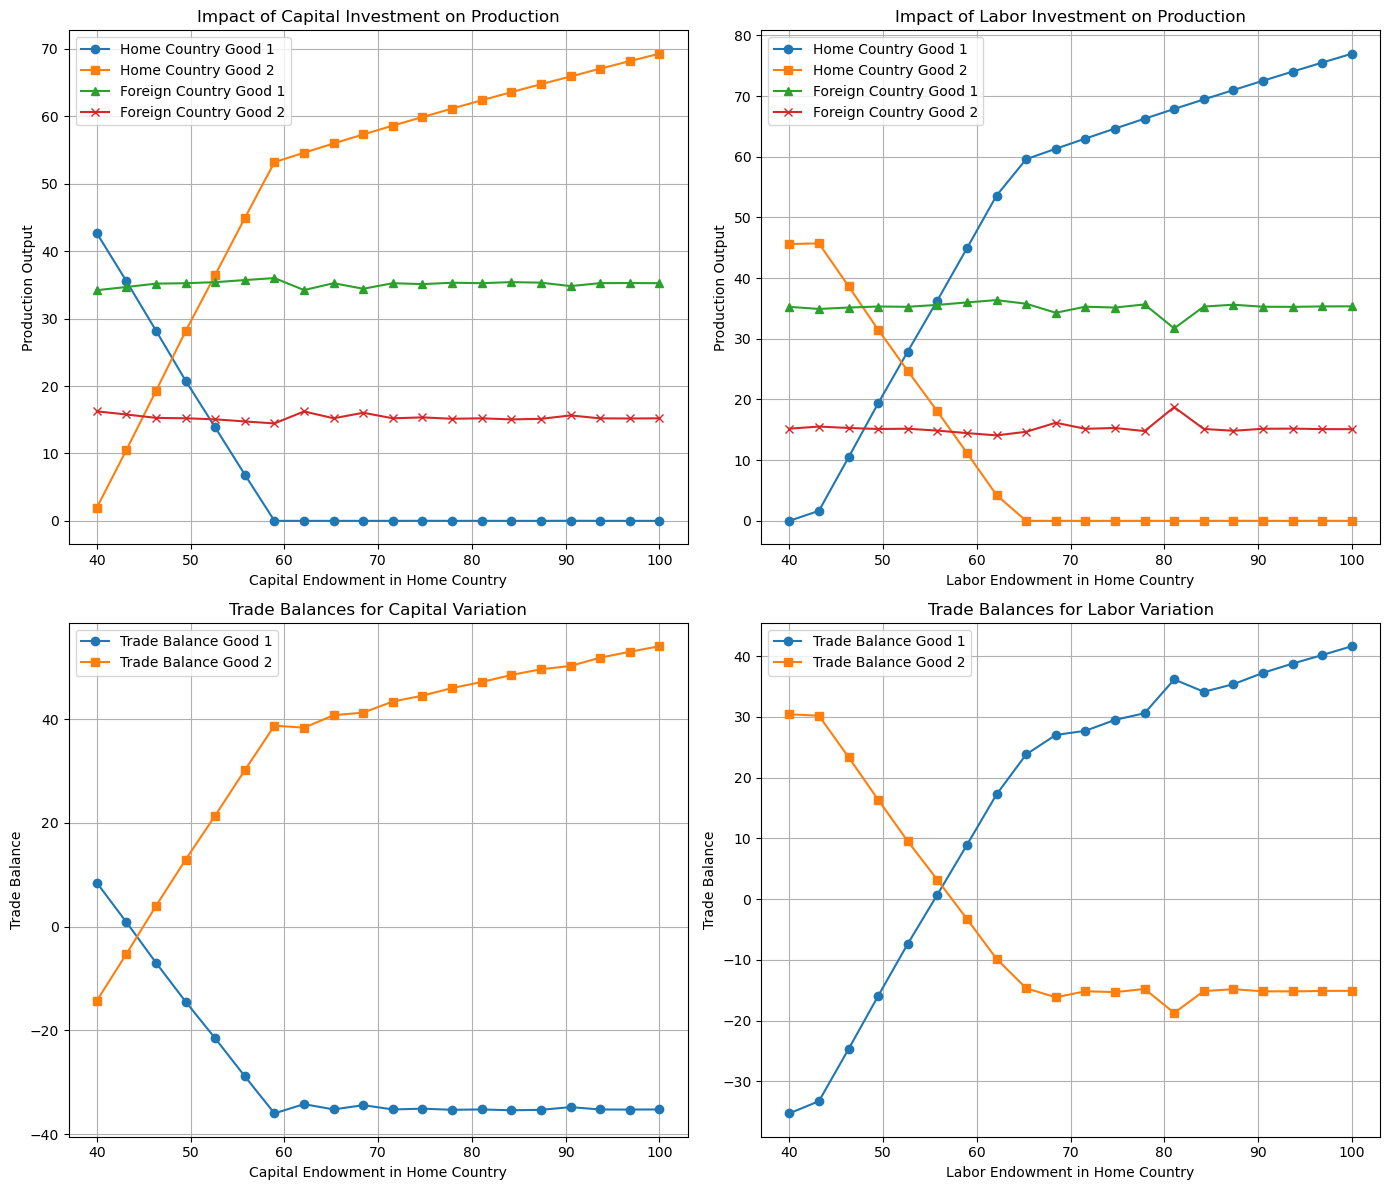

In [4]:
# Range of capital and labor to vary
K_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of capital
L_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of labor

# Results lists for capital and labor variation
Q1H_results_cap = []
Q2H_results_cap = []
Q1F_results_cap = []
Q2F_results_cap = []

Q1H_results_lab = []
Q2H_results_lab = []
Q1F_results_lab = []
Q2F_results_lab = []

trade_balance_good1_cap = []
trade_balance_good2_cap = []
trade_balance_good1_lab = []
trade_balance_good2_lab = []

# Fixed foreign capital and labor endowments
K_foreign, L_foreign = 48, 52

# Loop over capital endowments
for K_home in K_home_values:
    L_home = 48  # Fixed labor for capital variation plot
    def objective(x):
        K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
        Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
        Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
        Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
        Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
        return -(Q1H + Q2H + Q1F + Q2F)
    constraints = [
        {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},
        {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},
        {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},
        {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}
    ]
    bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    initial_guess = [10, 10, 10, 10, 10, 10, 10, 10]
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_cap.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_cap.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_cap.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_cap.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))
        trade_balance_good1_cap.append(Q1H_results_cap[-1] - Q1F_results_cap[-1])
        trade_balance_good2_cap.append(Q2H_results_cap[-1] - Q2F_results_cap[-1])
#in the above code essentially the same is done, but here we see that we also store the values

# Loop over labor endowments
for L_home in L_home_values:
    K_home = 52  # Fixed capital for labor variation plot
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_lab.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_lab.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_lab.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_lab.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))
        trade_balance_good1_lab.append(Q1H_results_lab[-1] - Q1F_results_lab[-1])
        trade_balance_good2_lab.append(Q2H_results_lab[-1] - Q2F_results_lab[-1])

# Plotting the results for capital and labor variations
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)  # Capital plot
plt.plot(K_home_values, Q1H_results_cap, label='Home Country Good 1', marker='o')
plt.plot(K_home_values, Q2H_results_cap, label='Home Country Good 2', marker='s')
plt.plot(K_home_values, Q1F_results_cap, label='Foreign Country Good 1', marker='^')
plt.plot(K_home_values, Q2F_results_cap, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Capital Investment on Production')
plt.xlabel('Capital Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)  # Labor plot
plt.plot(L_home_values, Q1H_results_lab, label='Home Country Good 1', marker='o')
plt.plot(L_home_values, Q2H_results_lab, label='Home Country Good 2', marker='s')
plt.plot(L_home_values, Q1F_results_lab, label='Foreign Country Good 1', marker='^')
plt.plot(L_home_values, Q2F_results_lab, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Labor Investment on Production')
plt.xlabel('Labor Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

# Additional plots for trade balances
plt.subplot(2, 2, 3)
plt.plot(K_home_values, trade_balance_good1_cap, label='Trade Balance Good 1', marker='o')
plt.plot(K_home_values, trade_balance_good2_cap, label='Trade Balance Good 2', marker='s')
plt.title('Trade Balances for Capital Variation')
plt.xlabel('Capital Endowment in Home Country')
plt.ylabel('Trade Balance')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(L_home_values, trade_balance_good1_lab, label='Trade Balance Good 1', marker='o')
plt.plot(L_home_values, trade_balance_good2_lab, label='Trade Balance Good 2', marker='s')
plt.title('Trade Balances for Labor Variation')
plt.xlabel('Labor Endowment in Home Country')
plt.ylabel('Trade Balance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Further analysis

### Land intensity:

Another thing which may added to the Hecksher-Ohlin model is the fact of land intensive production. Introducing land usage into the function also now makes the production dependent on how much land is availabel to produce on.

In [5]:
# New factor, land intensity"
# the higher this is, the more land we need to produce the good, here we will find the amount in our endowment"
gamma_1 = 0.01  
gamma_2 = 0.07 

# Endowments in each country
"new endowment called land, used to produce as the other endowments"
K_home, L_home, T_home = 52, 48, 60  
K_foreign, L_foreign, T_foreign = 48, 52, 50

# Objective function to maximize total production in both countries
def objective(x):
    "As before in the objective function, but now we also include the land"
    K1H, L1H, T1H, K2H, L2H, T2H, K1F, L1F, T1F, K2F, L2F, T2F = x
    Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1) * (T1H**gamma_1)
    Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2) * (T2H**gamma_2)
    Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1) * (T1F**gamma_1)
    Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2) * (T2F**gamma_2)
    return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

# Constraints for each country's total capital, labor, and land
constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[3] - K_home},  # Home capital
    {'type': 'eq', 'fun': lambda x: x[1] + x[4] - L_home},  # Home labor
    {'type': 'eq', 'fun': lambda x: x[2] + x[5] - T_home},  # Home land
    {'type': 'eq', 'fun': lambda x: x[6] + x[9] - K_foreign},  # Foreign capital
    {'type': 'eq', 'fun': lambda x: x[7] + x[10] - L_foreign},  # Foreign labor
    {'type': 'eq', 'fun': lambda x: x[8] + x[11] - T_foreign}  # Foreign land
]

# Bounds to ensure non-negative values for capital, labor, and land
bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

# Initial guesses for capital, labor, and land allocation
initial_guess = [15, 15, 15, 15, 20, 20, 10, 10, 10, 10, 10, 10]

# Perform optimization using SLSQP method which supports bounds
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    # Extract optimal allocation
    K1H_opt, L1H_opt, T1H_opt, K2H_opt, L2H_opt, T2H_opt, \
    K1F_opt, L1F_opt, T1F_opt, K2F_opt, L2F_opt, T2F_opt = result.x

    # Calculate the production of each good in each country using optimal inputs
    total_production_good1_home = A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1) * (T1H_opt**gamma_1)
    total_production_good2_home = A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2) * (T2H_opt**gamma_2)
    total_production_good1_foreign = A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1) * (T1F_opt**gamma_1)
    total_production_good2_foreign = A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2) * (T2F_opt**gamma_2)
    total_production_good1 = total_production_good1_home + total_production_good1_foreign
    total_production_good2 = total_production_good2_home + total_production_good2_foreign

    print(f"Optimization Success: {result.success}")
    print(f"Home country: Good 1 (K1H = {'{:.2f}'.format(K1H_opt)}, "
          f"L1H = {'{:.2f}'.format(L1H_opt)}, T1H = {'{:.2f}'.format(T1H_opt)}), "
          f"Good 2 (K2H = {'{:.2f}'.format(K2H_opt)}, L2H = {'{:.2f}'.format(L2H_opt)}, "
          f"T2H = {'{:.2f}'.format(T2H_opt)})")
    print(f"Foreign country: Good 1 (K1F = {'{:.2f}'.format(K1F_opt)}, "
          f"L1F = {'{:.2f}'.format(L1F_opt)}, T1F = {'{:.2f}'.format(T1F_opt)}), "
          f"Good 2 (K2F = {'{:.2f}'.format(K2F_opt)}, L2F = {'{:.2f}'.format(L2F_opt)}, "
          f"T2F = {'{:.2f}'.format(T2F_opt)})")
    print("Total production of Good 1 in Home Country:", '{:.2f}'.format(total_production_good1_home))
    print("Total production of Good 2 in Home Country:", '{:.2f}'.format(total_production_good2_home))
    print("Total production of Good 1 in Foreign Country:", '{:.2f}'.format(total_production_good1_foreign))
    print("Total production of Good 2 in Foreign Country:", '{:.2f}'.format(total_production_good2_foreign))
    print("Total production of Good 1:", '{:.2f}'.format(total_production_good1))
    print("Total production of Good 2:", '{:.2f}'.format(total_production_good2))
else:
    print("Optimization failed:", result.message)

Optimization Success: True
Home country: Good 1 (K1H = 0.00, L1H = 0.00, T1H = 0.00), Good 2 (K2H = 52.00, L2H = 48.00, T2H = 60.00)
Foreign country: Good 1 (K1F = 0.00, L1F = 0.00, T1F = 0.00), Good 2 (K2F = 48.00, L2F = 52.00, T2F = 50.00)
Total production of Good 1 in Home Country: 0.00
Total production of Good 2 in Home Country: 66.54
Total production of Good 1 in Foreign Country: 0.00
Total production of Good 2 in Foreign Country: 65.70
Total production of Good 1: 0.00
Total production of Good 2: 132.24


In the above model we can see that both the contrys allocate most of their land to good 2. Since even though it costs 7 times as much land to produce good 2, as per our specifications of $\gamma$, the countries value it highly since they are good at producing as per $ \alpha_{2} $.  

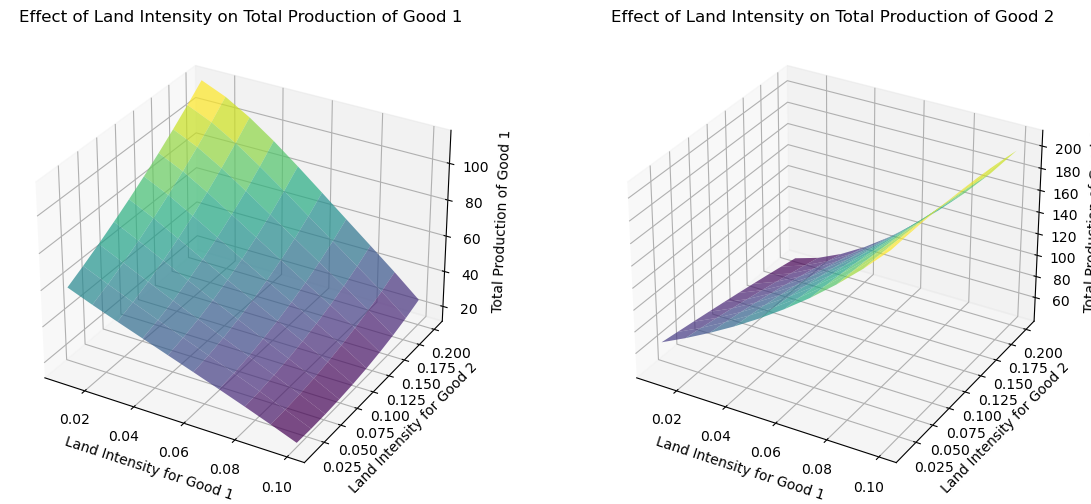

In [6]:
#next we want to plot how this production is affected by the land intensity
#this is done via having a range of land intensity values and then plotting the total production of each good
#we keep all parameters the same, but we change the land intensity. This to see how big the effect of the land intensity is on the production of each good

# Define factor intensities and productivity parameters
"to make it a bit more interesting we now want to obeserve good 1 as the easier t"
alpha_1 = 0.3
alpha_2 = 0.9
beta_1 = 0.7
beta_2 = 0.1
"the new part is again the variation of the land intensity"
gamma_1_values = np.linspace(0.01, 0.1, 10)  # Range of land intensity for variation
gamma_2_values = np.linspace(0.01, 0.2, 10)


# Endowments in each country
K_home, L_home, T_home = 52, 48, 60  
K_foreign, L_foreign, T_foreign = 48, 52, 50

# Objective function to maximize total production in both countries
def objective(x):
    K1H, L1H, T1H, K2H, L2H, T2H, K1F, L1F, T1F, K2F, L2F, T2F = x
    Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1) * (T1H**gamma_1)
    Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2) * (T2H**gamma_2)
    Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1) * (T1F**gamma_1)
    Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2) * (T2F**gamma_2)
    return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

# Lists to store results
total_production_good1 = np.zeros((len(gamma_1_values), len(gamma_2_values)))
total_production_good2 = np.zeros((len(gamma_1_values), len(gamma_2_values)))

# Loop over land intensity values
"now we loop over the land intensity values, to view them all"
for i, gamma_1 in enumerate(gamma_1_values):
    for j, gamma_2 in enumerate(gamma_2_values):
        def objective(x):
            # Define the objective function using the current land intensity values
            Q1H = A_home * (x[0]**alpha_1) * (x[1]**beta_1) * (x[2]**gamma_1)
            Q2H = A_home * (x[3]**alpha_2) * (x[4]**beta_2) * (x[5]**gamma_2)
            Q1F = A_foreign * (x[6]**alpha_1) * (x[7]**beta_1) * (x[8]**gamma_1)
            Q2F = A_foreign * (x[9]**alpha_2) * (x[10]**beta_2) * (x[11]**gamma_2)
            return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

        # Perform optimization
        result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        "Given that there is a result we extract this result and store it in the total production of each good"
        if result.success:
            # Extract optimal allocation
            K1H_opt, L1H_opt, T1H_opt, K2H_opt, L2H_opt, T2H_opt, \
            K1F_opt, L1F_opt, T1F_opt, K2F_opt, L2F_opt, T2F_opt = result.x
            # Calculate total production of each good using optimal inputs
            total_production_good1[i, j] = A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1) * (T1H_opt**gamma_1) + \
                                            A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1) * (T1F_opt**gamma_1)
            total_production_good2[i, j] = A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2) * (T2H_opt**gamma_2) + \
                                            A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2) * (T2F_opt**gamma_2)

# Plotting the figure
fig = plt.figure(figsize=(14, 6))

# Plot total production of Good 1 for home country
ax = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(gamma_1_values, gamma_2_values)
ax.plot_surface(X, Y, total_production_good1, cmap='viridis', alpha=0.7)
ax.set_xlabel('Land Intensity for Good 1')
ax.set_ylabel('Land Intensity for Good 2')
ax.set_zlabel('Total Production of Good 1')
ax.set_title('Effect of Land Intensity on Total Production of Good 1')

# Plot total production of Good 2 for home country
ax = fig.add_subplot(122, projection='3d')
X, Y = np.meshgrid(gamma_1_values, gamma_2_values)  # Corrected this line
ax.plot_surface(X, Y, total_production_good2, cmap='viridis', alpha=0.7)
ax.set_xlabel('Land Intensity for Good 1')
ax.set_ylabel('Land Intensity for Good 2')
ax.set_zlabel('Total Production of Good 2')
ax.set_title('Effect of Land Intensity on Total Production of Good 2')

plt.show()

In the above plots we see that when the land intensity of a good is high, then it will get produced less. But for good 1 the land intensity has to be at its lowest and also the land intensity of good 2 has to be at its highest. The sam isn't true for good 2, which will get produced no matter how high it is, just given that good 1 is high. This can be attributed to preferrences for good 2.

# Conclusion

In this model project, we sought to provide some insights into the workings of the Heckscher-Ohlin model applied to a two-country, two-good scenario. With our code and its visualizations, we attempt to illustrate the role of factor endowments in shaping production and trade patterns in a simplified scenario. Specifically, we observed how variations in capital, labor, and land intensities influence the production capacities and trade balances of each country. By integrating land as a production factor, we further augmented the model, in an attempt to show the multivariate interplay between different production factors. The simulations showed that goods requiring higher land intensity were produced less, illustrating the constraints imposed by limited resources.

In conclusion, our simulation serves to illuminate some of the core principles of international trade and economics, employing some of the skills we have learned so far on a model that reflects a real world problem.